# Rețele neuronale feedforward

[Aici](https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/) aveti un tutorial foarte bun pentru a înțelege cum funcționează backpropagation.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

### Ce ponderi ar trebui sa aibă o rețea cu 2 straturi pentru a da funcția XOR?

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
for xi,yi in zip(X, y):
    print('Exemplul: ', xi, '; eticheta reala: ', yi)


Exemplul:  [0 0] ; eticheta:  0
Exemplul:  [0 1] ; eticheta:  1
Exemplul:  [1 0] ; eticheta:  1
Exemplul:  [1 1] ; eticheta:  0


In [19]:
w1 = np.array([[-1, 1], [1, -1]])
print('ponderi stratul 1:\n', w1)
w2 = np.array([[1.0],[1.0]])
print('ponderi stratul 2:\n', w2)

b1 = np.array([-0.5, -0.5])
print('bias strat 1:\n', b1)
b2 = np.array([0])
print('bias strat 2:\n', b2)


ponderi stratul 1:
 [[-1  1]
 [ 1 -1]]
ponderi stratul 2:
 [[1.]
 [1.]]
bias strat 1:
 [-0.5 -0.5]
bias strat 2:
 [0]


In [16]:
def relu(vector_de_numere):
    """Rectified Linear Unit
    https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
    """
    vector_de_numere = np.array(vector_de_numere)
    # if nr < 0:
    #     return 0
    vector_de_numere[vector_de_numere < 0] = 0
    return vector_de_numere
print(relu([10, 2, 3, -0.2, -0, -10]))


[10.  2.  3.  0.  0.  0.]


In [22]:

for xi in X:
    output_strat_1 = relu(np.dot(xi, w1) + b1)
    output_strat_2 = np.dot(output_strat_1, w2) + b2
    rezultat = np.ceil(relu(output_strat_2))
    print('Pentru input: ', xi, ' rezultatul este: ', rezultat)

Pentru input:  [0 0]  rezultatul este:  [0.]
Pentru input:  [0 1]  rezultatul este:  [1.]
Pentru input:  [1 0]  rezultatul este:  [1.]
Pentru input:  [1 1]  rezultatul este:  [0.]


In [54]:
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu',
                max_iter=100, solver='lbfgs')
mlp.fit(X, y)
y_pred = mlp.predict(X)                     
print(y_pred)
print(mlp.coefs_)
print(mlp.intercepts_)

[0 1 1 0]
[array([[ 3.30966681,  4.91933176],
       [-3.30593673, -4.91932776]]), array([[-5.03215071],
       [ 6.91254699]])]
[array([ 4.27538051e+00, -3.71571569e-06]), array([13.06702845])]


In [55]:

for xi in X:
    output_strat_1 = relu(np.dot(xi, mlp.coefs_[0]) + mlp.intercepts_[0])
    output_strat_2 = np.dot(output_strat_1, mlp.coefs_[1]) + mlp.intercepts_[1]
    rezultat = np.ceil(relu(output_strat_2))
    print('Pentru input: ', xi, ' rezultatul este: ', rezultat)

Pentru input:  [0 0]  rezultatul este:  [0.]
Pentru input:  [0 1]  rezultatul este:  [9.]
Pentru input:  [1 0]  rezultatul este:  [9.]
Pentru input:  [1 1]  rezultatul este:  [0.]


[array([[-2.10670812e-19, -9.76565097e-01,  1.08118115e-08,
        -1.84042758e+00],
       [ 8.94559687e-28,  1.16697680e+00, -3.61517323e-04,
         1.84050591e+00]]), array([[ 6.40177520e-06, -1.39408140e-04],
       [-8.97698244e-01,  1.66317588e+00],
       [ 1.78000882e-11,  4.34252685e-14],
       [ 1.79813808e+00, -1.57394705e+00]]), array([[ 2.18725108],
       [-2.10696908]])]


### Suprafata de decizie

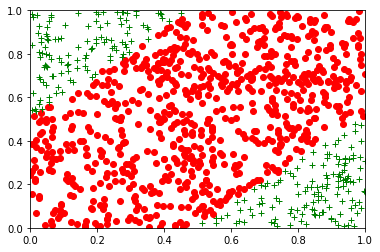

In [56]:
points = np.random.rand(1000,2)
labels = mlp.predict(points)
plt.ylim((0, 1))    
plt.xlim((0, 1))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()

### Ce se intampla cand crestem numarul de neuroni pe strat?

In [57]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',solver='lbfgs',alpha=0.001, max_iter=10000)
mlp2.fit(X, y)                   
y_pred=mlp2.predict(X)            
print(y_pred)

[0 1 1 0]


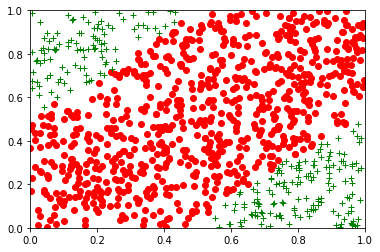

In [58]:
points = np.random.rand(1000,2)
labels = mlp2.predict(points)
plt.ylim((0, 1))    
plt.xlim((0, 1))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()


## Clasificarea unor puncte in triunghi


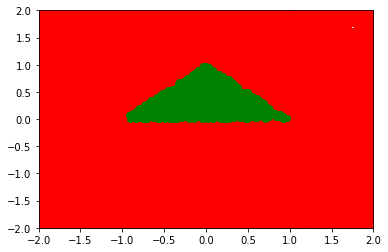

In [59]:
#eticheteaza punctele din triunghi
def eticheteazaPuncte(x, y):
    if x-y+1 >= 0 and y >= 0 and x+y <= 1:
        return 1
    return 0


points = np.random.rand(20000,2)*4-2
labels = np.zeros(20000)
for i in range(20000):
    labels[i] = eticheteazaPuncte(points[i,0],points[i,1])
plt.ylim((-2, 2))    
plt.xlim((-2, 2))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'go')
plt.show()



In [60]:

train_points = points[:10000,:]
train_labels = labels[:10000]
test_points = points[10000:20000,:]
test_labes = labels[10000:20000]
print(train_points.shape)
print(test_points.shape)
print(points.shape)



(10000, 2)
(10000, 2)
(20000, 2)


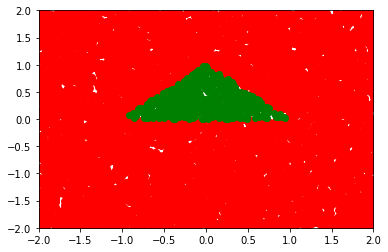

In [61]:

model = MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(100,100), alpha=0.001, solver='lbfgs', verbose = True)
model.fit(train_points, train_labels)
labels_predicted = model.predict(test_points)
plt.ylim((-2, 2))    
plt.xlim((-2, 2))  
plt.plot(test_points[labels_predicted == 0, 0], test_points[labels_predicted == 0, 1], 'ro')
plt.plot(test_points[labels_predicted == 1, 0], test_points[labels_predicted == 1, 1], 'go')
plt.show()

